# **Banking Dataset Analysis and Classification**
---


The banking dataset contains a diverse range of attributes related to customer information and banking activities. Here's a unique description of each field:

### Preparing Our Environment

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,FunctionTransformer



### Loading data
---


In [2]:
train = pd.read_csv('Train-Set.csv')
test = pd.read_csv('Test-Set.csv')

### Exploratory Data Analysis (EDA):


---



| Categorical Columns | Numerical Columns |
|---------------------|-------------------|
| Job                 | Age               |
| Marital             | Balance           |
| Education           | Day               |
| Default             | Duration          |
| Housing             | Campaign          |
| Loan                | Pdays             |
| Contact             | Previous          |
| Month               |                   |
| Poutcome            |                   |
| Target              |                   |


In [3]:
train.describe()

,Unnamed: 0,id,age,balance,duration,campaign,pdays,previous
count,54712.000000,54712.000000,54712.000000,31842.000000,54712.000000,54712.000000,54712.000000,54712.000000
mean,38925.687582,45173.763397,40.580147,1368.024590,257.282260,2.679961,425.022829,0.407351
std,22553.956707,25935.559039,10.544504,3057.847866,255.270335,2.966822,476.813012,1.520253
min,0.000000,0.000000,17.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,19414.750000,22737.750000,32.000000,73.000000,103.000000,1.000000,-1.000000,0.000000
50%,38803.000000,45248.000000,39.000000,449.000000,180.000000,2.000000,88.000000,0.000000
75%,58491.250000,67581.250000,48.000000,1435.000000,318.000000,3.000000,999.000000,0.000000
max,78160.000000,89999.000000,98.000000,98417.000000,4199.000000,58.000000,999.000000,58.000000


In [4]:
test.describe()

,Unnamed: 0,id,age,balance,duration,campaign,pdays,previous
count,23449.000000,23449.000000,23449.000000,13369.000000,23449.000000,23449.000000,23449.000000,23449.000000
mean,39440.046953,44777.816751,40.471278,1348.570798,260.168195,2.673973,437.680157,0.413962
std,22581.404377,26025.071993,10.523918,3013.448064,264.701435,2.940402,478.690646,2.306765
min,1.000000,2.000000,17.000000,-6847.000000,0.000000,1.000000,-1.000000,0.000000
25%,19817.000000,22292.000000,32.000000,71.000000,104.000000,1.000000,-1.000000,0.000000
50%,39724.000000,44890.000000,39.000000,446.000000,180.000000,2.000000,106.000000,0.000000
75%,58938.000000,67220.000000,48.000000,1401.000000,321.000000,3.000000,999.000000,0.000000
max,78159.000000,89997.000000,94.000000,102127.000000,4918.000000,63.000000,999.000000,275.000000


In [5]:
# Basic information about the dataset
data_info = train.info()
# Summary statistics for numerical columns
summary_stats = train.describe()
# Summary statistics for categorical columns
categorical_stats = train.describe(include=['object'])
# Check for missing values
missing_values = train.isnull().sum()
data_info, summary_stats, categorical_stats, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     31842 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  object 
dtypes: float64(1), int64(7), 

(None,
          Unnamed: 0            id           age       balance      duration  \
 count  54712.000000  54712.000000  54712.000000  31842.000000  54712.000000   
 mean   38925.687582  45173.763397     40.580147   1368.024590    257.282260   
 std    22553.956707  25935.559039     10.544504   3057.847866    255.270335   
 min        0.000000      0.000000     17.000000  -8019.000000      0.000000   
 25%    19414.750000  22737.750000     32.000000     73.000000    103.000000   
 50%    38803.000000  45248.000000     39.000000    449.000000    180.000000   
 75%    58491.250000  67581.250000     48.000000   1435.000000    318.000000   
 max    78160.000000  89999.000000     98.000000  98417.000000   4199.000000   
 
            campaign         pdays      previous  
 count  54712.000000  54712.000000  54712.000000  
 mean       2.679961    425.022829      0.407351  
 std        2.966822    476.813012      1.520253  
 min        1.000000     -1.000000      0.000000  
 25%        1.00

In [6]:
print('Train shape:',train.shape)
print('Test shape:',test.shape)

Train shape: (54712, 19)
Test shape: (23449, 18)


In [7]:
train.isnull().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       22870
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Target            0
dtype: int64

C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\849626539.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chi2_df, y='Feature', x='Chi2', orient='h', palette='rocket')


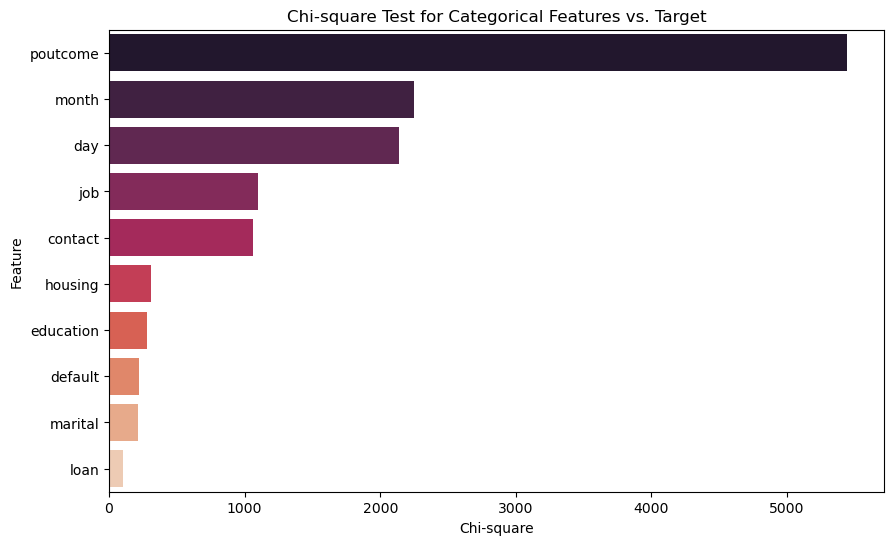

In [8]:
from scipy.stats import chi2_contingency

def chi_square(frame, features, target):
    chi2_dict = {}
    p_value_dict = {}
    
    for feature in features:
        contingency_table = pd.crosstab(frame[feature], frame[target])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_dict[feature] = chi2
        p_value_dict[feature] = p_value
    
    # Create a dataframe to visualize the results
    chi2_df = pd.DataFrame({'Feature': features, 'Chi2': chi2_dict.values(), 'P-Value': p_value_dict.values()})
    chi2_df = chi2_df.sort_values(by='Chi2', ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(data=chi2_df, y='Feature', x='Chi2', orient='h', palette='rocket')
    plt.xlabel('Chi-square')
    plt.ylabel('Feature')
    plt.title('Chi-square Test for Categorical Features vs. Target')

# Assuming 'Target' is your categorical target variable column name
categorical_cols = [col for col in train.columns if train.dtypes[col] == 'object']
categorical_cols.remove('Target')


chi_square(train, categorical_cols, 'Target')

In [9]:
# Manually encode the target variable
train['Target'] = train['Target'].map({'yes': 1, 'no': 0})
# Display the mapping of labels to encoded values
print("Unique values in target variable after encoding:", train['Target'].unique())

Unique values in target variable after encoding: [0 1]


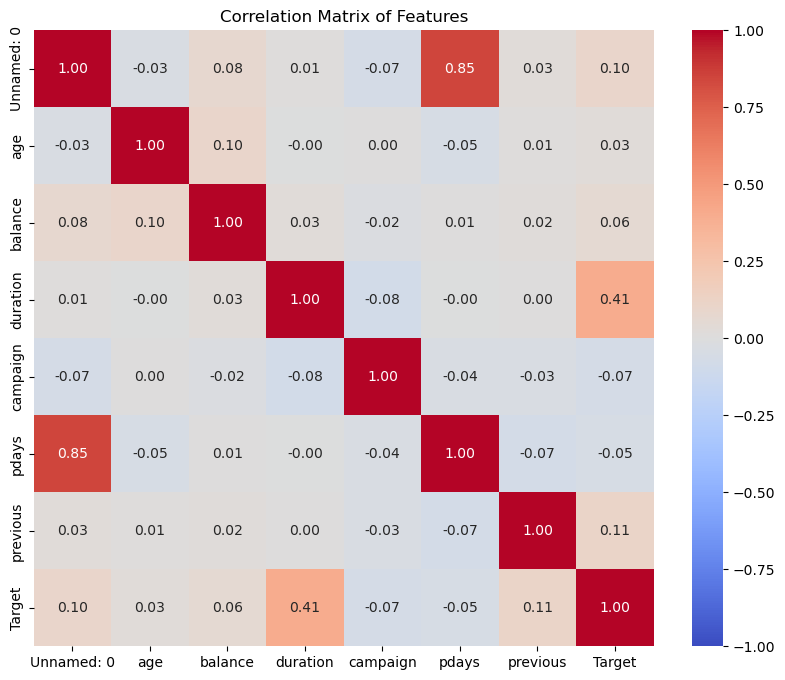

In [10]:
# Numerical features
numerical_cols = [col for col in train.columns if train.dtypes[col] != 'object']
numerical_cols.remove('id')

# categorical features
categorical_cols = [col for col in train.columns if train.dtypes[col] == 'object']
corr_matrix = train[numerical_cols].corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [11]:
numerical_cols

['Unnamed: 0',
 'age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'Target']

In [12]:
train['Target'].unique()

array([0, 1], dtype=int64)

##### **Age**


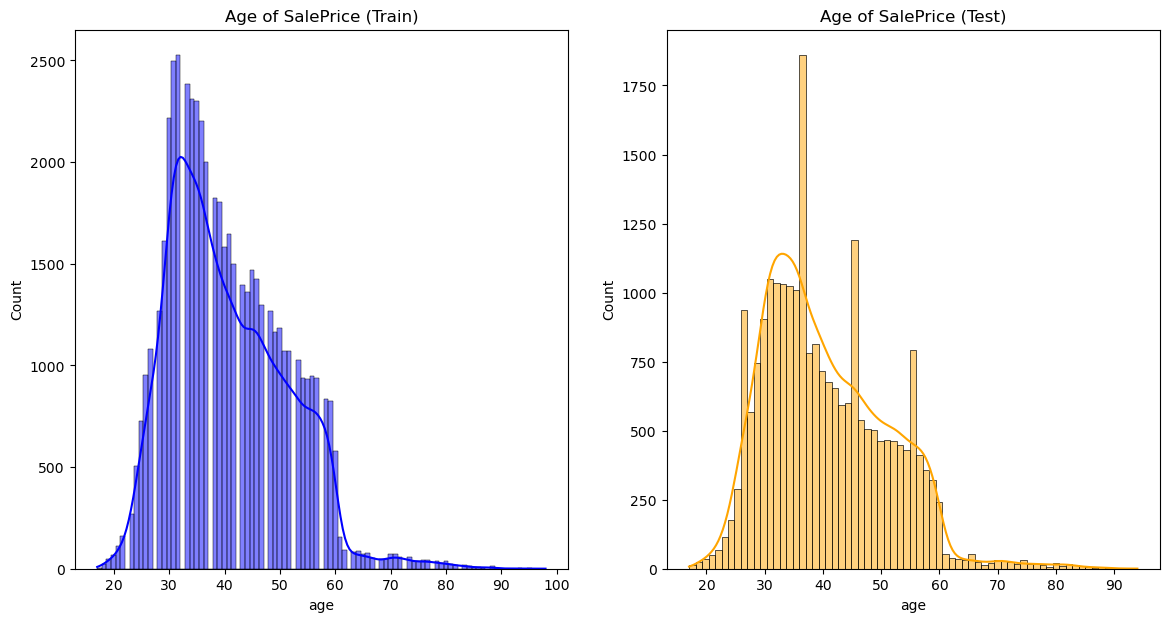

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot the histogram and KDE for the 'train' DataFrame in the first subplot
sns.histplot(train['age'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Age of SalePrice (Train)')

# Plot the histogram and KDE for the 'test' DataFrame in the second subplot
sns.histplot(test['age'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Age of SalePrice (Test)')

# Display the plots
plt.show()


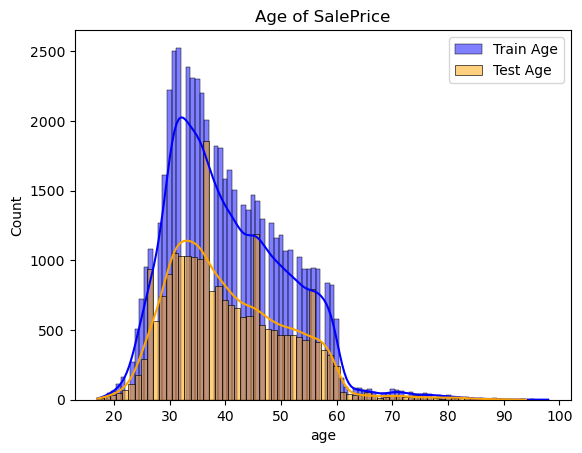

In [14]:
# Assuming 'train' and 'test' are your DataFrames and 'age' is the column of interest
sns.histplot(train['age'], kde=True, color='blue', label='Train Age', alpha=0.5)
sns.histplot(test['age'], kde=True, color='orange', label='Test Age', alpha=0.5)

plt.title('Age of SalePrice')
plt.legend()
plt.show()

##### **Job**


In [15]:
train['job'].value_counts()

job
blue-collar      12042
admin.            9346
technician        9122
management        8292
services          5148
retired           2557
self-employed     1883
entrepreneur      1876
unemployed        1463
housemaid         1457
student           1150
unknown            376
Name: count, dtype: int64

##### **Marital**


In [16]:
print("Train\n",train['marital'].value_counts())
print("\n")
print("Test\n",test['marital'].value_counts())

Train
 marital
married     33095
single      15362
divorced     6209
unknown        46
Name: count, dtype: int64


Test
 marital
married     14072
single       6685
divorced     2673
unknown        19
Name: count, dtype: int64


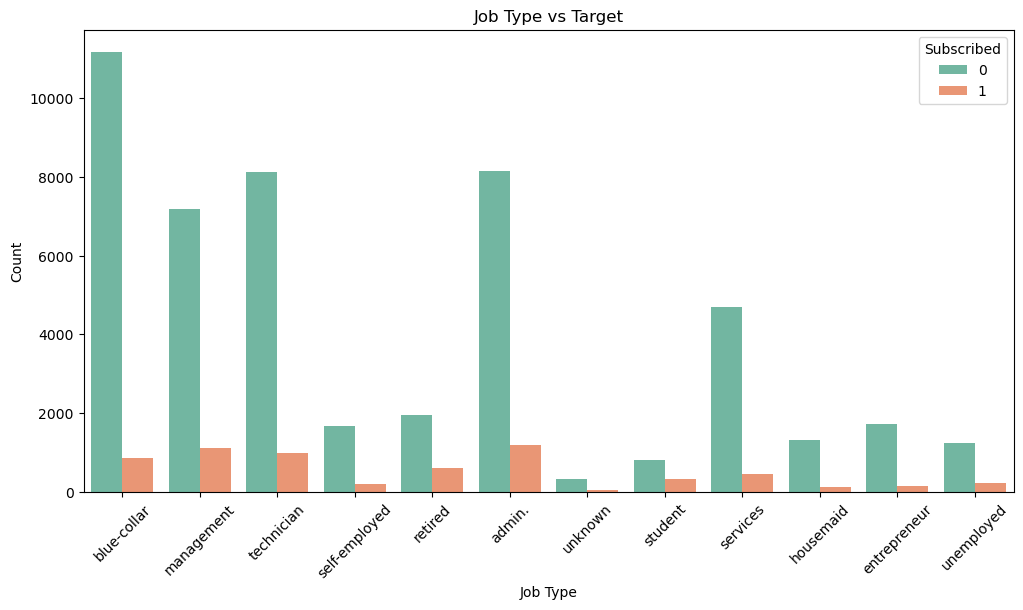

In [17]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='job', hue='Target', palette='Set2') 
plt.title('Job Type vs Target') 
plt.xlabel('Job Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Education**


In [18]:
test['education'].describe().T

count         23449
unique           11
top       secondary
freq           6845
Name: education, dtype: object

In [19]:
print("Train\n",train['education'].value_counts())
print("\n")
print("Test\n",test['education'].value_counts())

Train
 education
secondary              16357
tertiary                9313
university.degree       6741
high.school             5292
primary                 4854
basic.9y                3380
professional.course     2925
unknown                 2276
basic.4y                2256
basic.6y                1306
illiterate                12
Name: count, dtype: int64


Test
 education
secondary              6845
tertiary               3988
university.degree      2995
high.school            2304
primary                1997
basic.9y               1446
professional.course    1267
basic.4y               1066
unknown                 978
basic.6y                559
illiterate                4
Name: count, dtype: int64


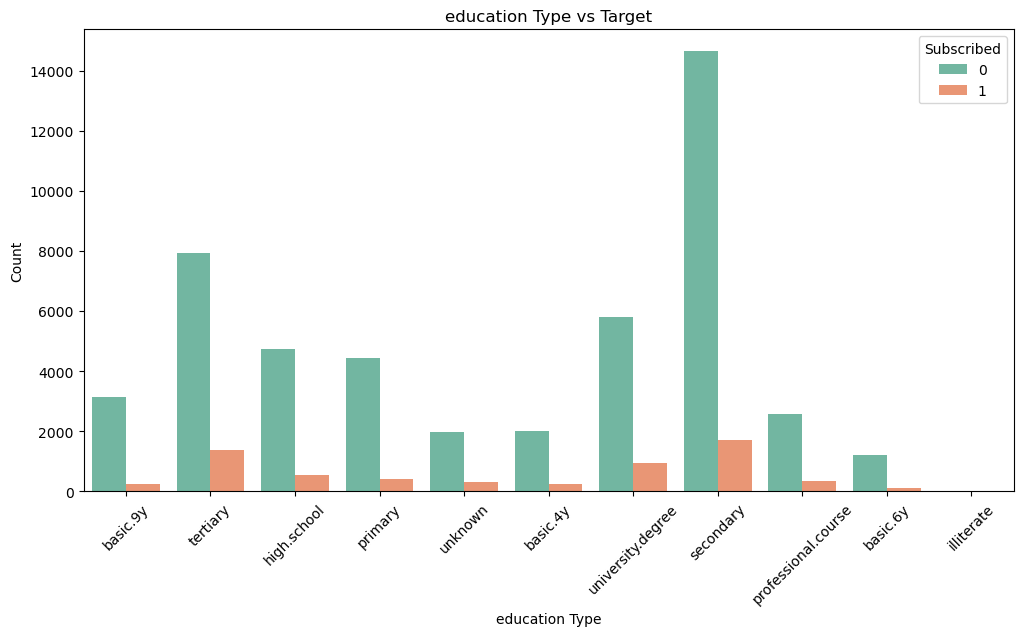

In [20]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='education', hue='Target', palette='Set2') 
plt.title('education Type vs Target') 
plt.xlabel('education Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Default**


In [21]:
print("Train\n",train['default'].value_counts())
print("\n")
print("Test\n",test['default'].value_counts())

Train
 default
no         49368
unknown     4754
yes          590
Name: count, dtype: int64


Test
 default
no         21035
unknown     2186
yes          228
Name: count, dtype: int64


##### **Balance**


In [22]:
print("Train\n",train['balance'].value_counts())
print("\n")
print("Test\n",test['balance'].value_counts())

Train
 balance
 0.0        2489
 1.0         140
 2.0          97
 3.0          97
 4.0          94
            ... 
-1485.0        1
 13901.0       1
-880.0         1
 8648.0        1
-665.0         1
Name: count, Length: 6321, dtype: int64


Test
 balance
 0.0       1025
 2.0         59
 1.0         55
 4.0         45
 3.0         37
           ... 
 8585.0       1
-666.0        1
-563.0        1
 5432.0       1
 9683.0       1
Name: count, Length: 4245, dtype: int64


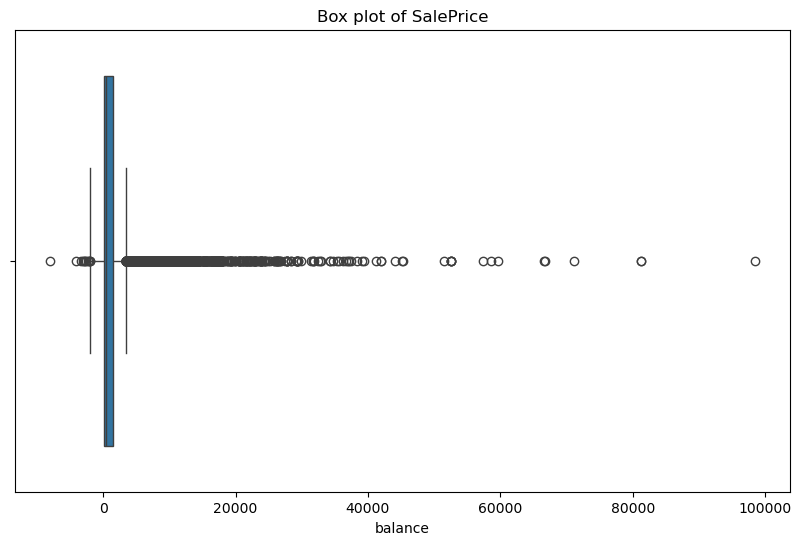

In [23]:
# Box plot for SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['balance'])
plt.title('Box plot of SalePrice')
plt.show()

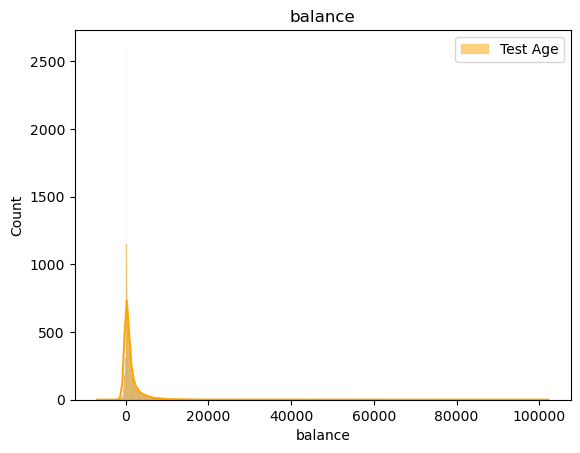

In [24]:
# Assuming 'train' and 'test' are your DataFrames and 'age' is the column of interest
sns.histplot(test['balance'], kde=True, color='orange', label='Test Age', alpha=0.5)

plt.title('balance')
plt.legend()
plt.show()

##### **Housing**


In [25]:
print("Train\n",train['housing'].value_counts())
print("\n")
print("Test\n",test['housing'].value_counts())

Train
 housing
yes        29666
no         24503
unknown      543
Name: count, dtype: int64


Test
 housing
yes        12718
no         10478
unknown      253
Name: count, dtype: int64


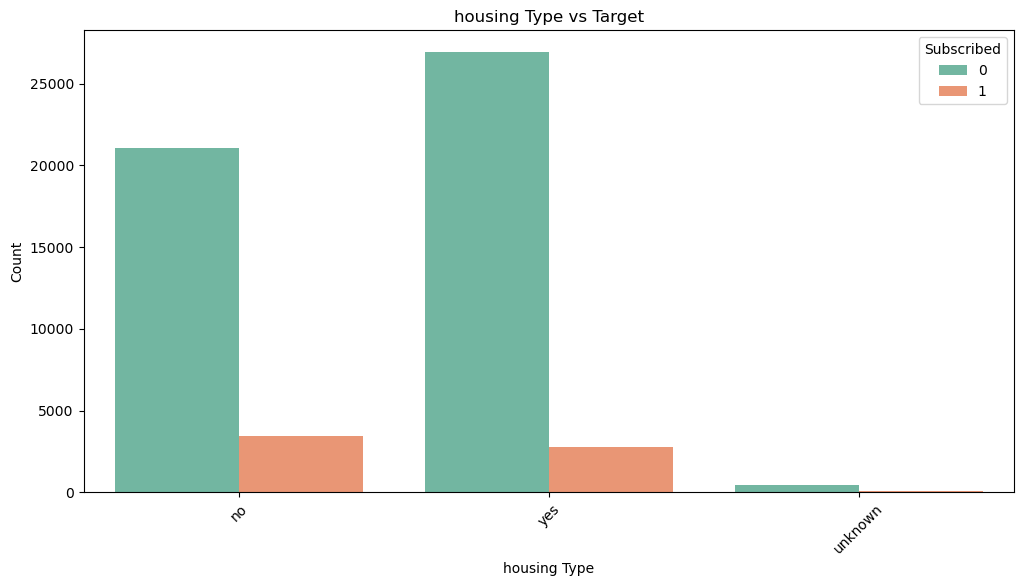

In [26]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='housing', hue='Target', palette='Set2') 
plt.title('housing Type vs Target') 
plt.xlabel('housing Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Loan**


In [27]:
print("Train\n",train['loan'].value_counts())
print("\n")
print("Test\n",test['loan'].value_counts())

Train
 loan
no         45564
yes         8605
unknown      543
Name: count, dtype: int64


Test
 loan
no         19534
yes         3662
unknown      253
Name: count, dtype: int64


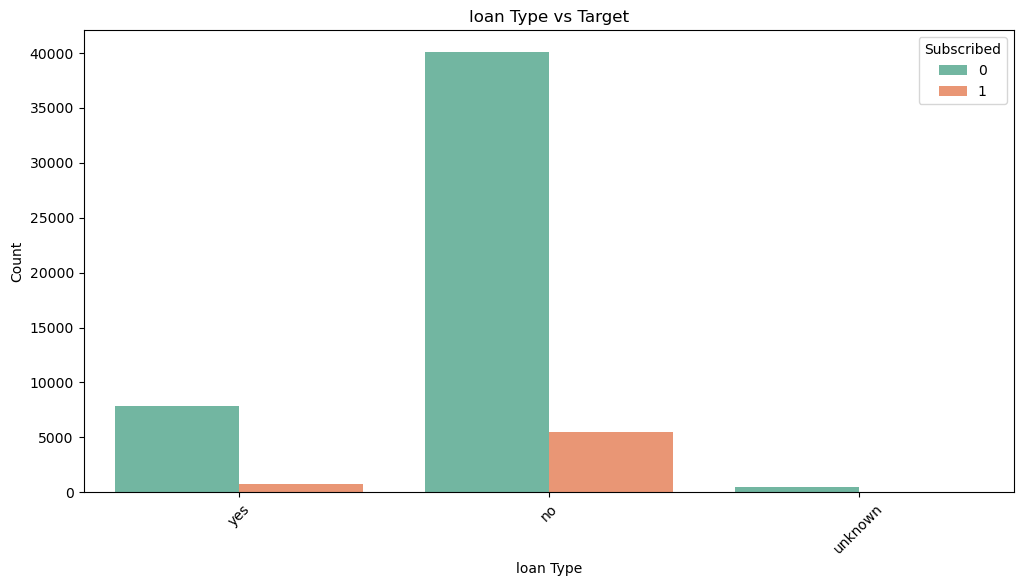

In [28]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='loan', hue='Target', palette='Set2') 
plt.title('loan Type vs Target') 
plt.xlabel('loan Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **contact**


In [29]:
print("Train\n",train['contact'].value_counts())
print("\n")
print("Test\n",test['contact'].value_counts())

Train
 contact
cellular     35134
telephone    10424
unknown       9154
Name: count, dtype: int64


Test
 contact
cellular     15059
telephone     4524
unknown       3866
Name: count, dtype: int64


##### **Day**


In [30]:
s=train['day'].unique()
s.sort()
s


array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '4', '5', '6', '7', '8', '9', 'apr', 'aug', 'dec',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], dtype=object)

In [31]:
print("Train\n",train['day'].value_counts())
print("\n")
print("Test\n",test['day'].value_counts())

Train
 day
may    7636
jul    4019
aug    3394
jun    2980
nov    2302
20     1958
18     1603
21     1443
apr    1425
17     1374
6      1368
5      1337
8      1322
14     1303
7      1279
28     1268
29     1208
19     1202
15     1195
13     1117
30     1107
12     1104
9      1091
11     1078
4      1039
16      991
2       896
27      776
26      761
3       752
23      656
22      649
25      600
31      468
oct     412
10      372
sep     320
24      300
mar     281
1       225
dec     101
Name: count, dtype: int64


Test
 day
may    3375
jul    1744
aug    1554
jun    1267
nov     964
20      794
18      705
apr     660
21      583
5       573
17      565
6       564
28      562
19      555
14      545
7       538
29      537
8       520
15      508
12      499
9       470
13      468
30      459
16      424
4       406
11      401
2       397
27      345
3       327
23      283
26      274
22      256
25      240
31      175
oct     175
mar     155
10      152
24      147
sep

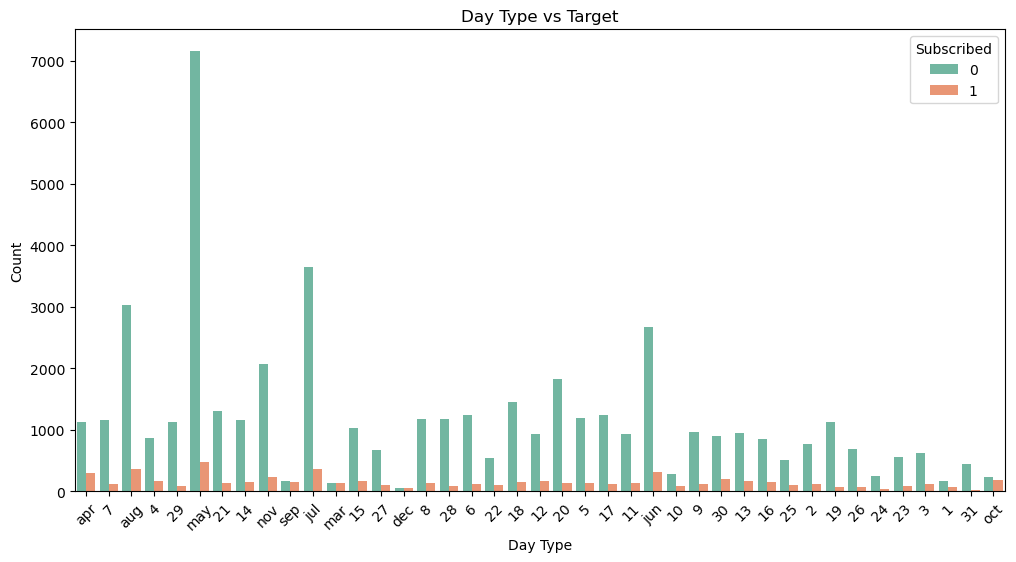

In [32]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='day', hue='Target', palette='Set2') 
plt.title('Day Type vs Target') 
plt.xlabel('Day Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Month**


In [33]:
train['month'].unique()

s=train['month'].unique()
s.sort()
s

array(['apr', 'aug', 'dec', 'feb', 'fri', 'jan', 'jul', 'jun', 'mar',
       'may', 'mon', 'nov', 'oct', 'sep', 'thu', 'tue', 'wed'],
      dtype=object)

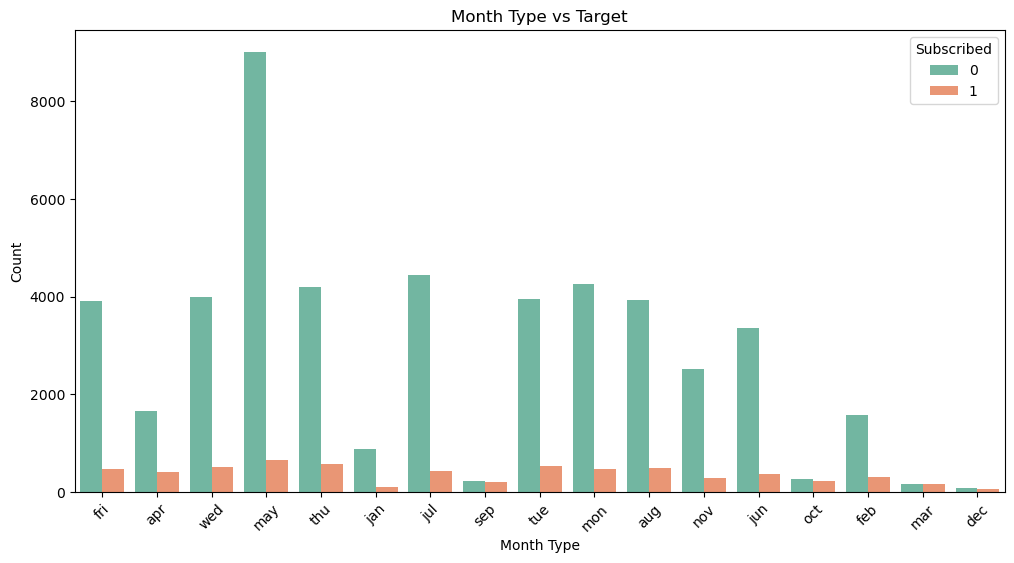

In [34]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='month', hue='Target', palette='Set2') 
plt.title('Month Type vs Target') 
plt.xlabel('Month Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Duration**


In [35]:
train['duration'].unique()

array([ 583,  725,   74, ..., 1397, 1558, 1250], dtype=int64)

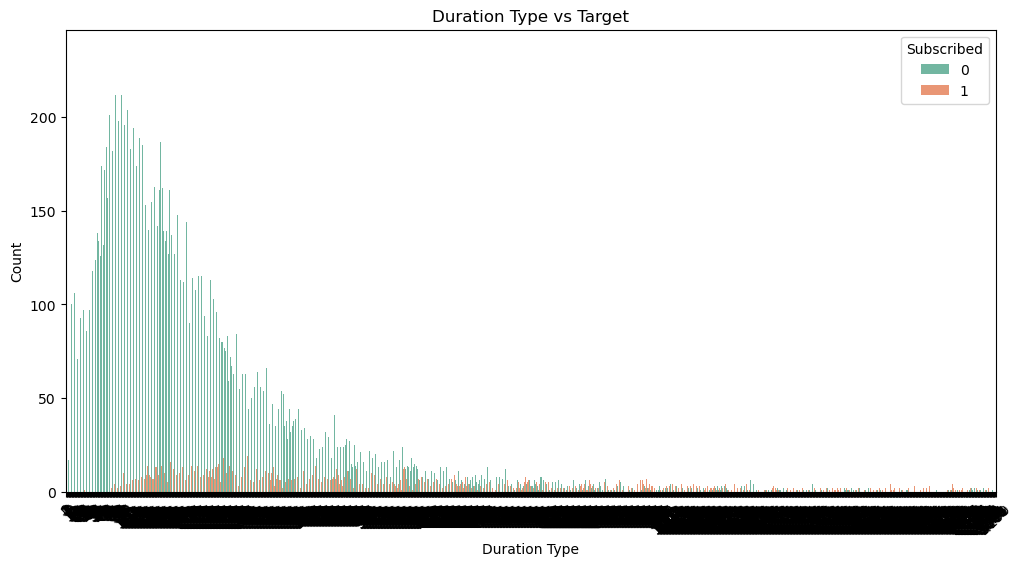

In [36]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='duration', hue='Target', palette='Set2') 
plt.title('Duration Type vs Target') 
plt.xlabel('Duration Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Campaign**


In [37]:
train['campaign'].unique()

array([ 2,  3,  1,  5, 13,  4,  7, 18,  8, 10, 14, 12,  6, 55, 17,  9, 11,
       15, 43, 20, 29, 16, 22, 19, 23, 32, 30, 21, 28, 25, 26, 41, 56, 27,
       35, 24, 36, 38, 31, 44, 50, 40, 34, 33, 58, 51, 37], dtype=int64)

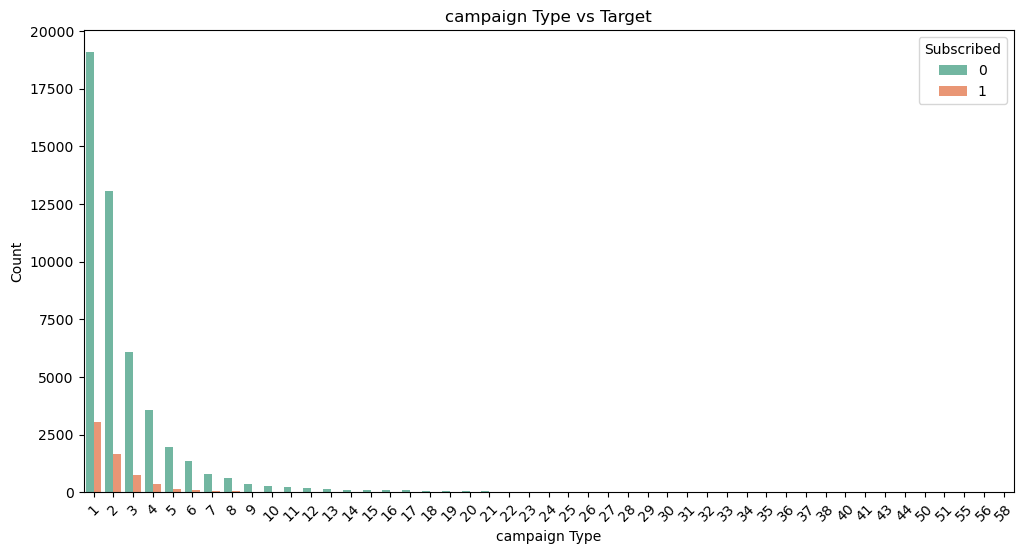

In [38]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='campaign', hue='Target', palette='Set2') 
plt.title('campaign Type vs Target') 
plt.xlabel('campaign Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Pdays**


In [39]:
train['pdays'].unique()

array([999,  -1,  92, 206, 268, 175,  98, 329,  79, 340, 430, 155, 259,
       154, 276,   4, 207, 178, 355,  70, 346,  28, 182, 326,   3, 349,
         2, 370,  91, 180,  95, 165, 251, 336, 228, 131, 144, 229, 173,
       295, 687, 551, 367, 246, 328, 287,   6, 270, 151, 214, 149, 302,
       196,  94,  97, 261, 350,  11, 372, 264, 432, 104, 339, 126, 500,
        25, 105, 352, 363, 172, 368, 183, 185, 286, 267,  15,  27, 265,
        99,  90, 354, 184, 337, 168, 135, 247, 174, 332,  12, 223,  80,
       300, 241, 356, 383, 493,   1, 345,   9, 123,  96, 187,  24, 112,
       186, 212, 179, 330, 141,   5,  18, 190, 111, 202, 541, 271, 369,
       254, 136, 106, 203, 351,  81, 195, 388,  32, 150, 181, 140,  10,
       113, 305, 170,  35, 200, 319, 122, 760,  78, 171, 108, 192,   8,
       826, 357,  73,  13, 238, 342, 199, 299, 405, 457, 364, 269,  75,
       321,  58, 145, 110,  83, 257, 129, 127, 285, 371, 231, 152, 177,
       412, 176, 220, 317, 323, 230, 373, 562, 103, 188, 291, 34

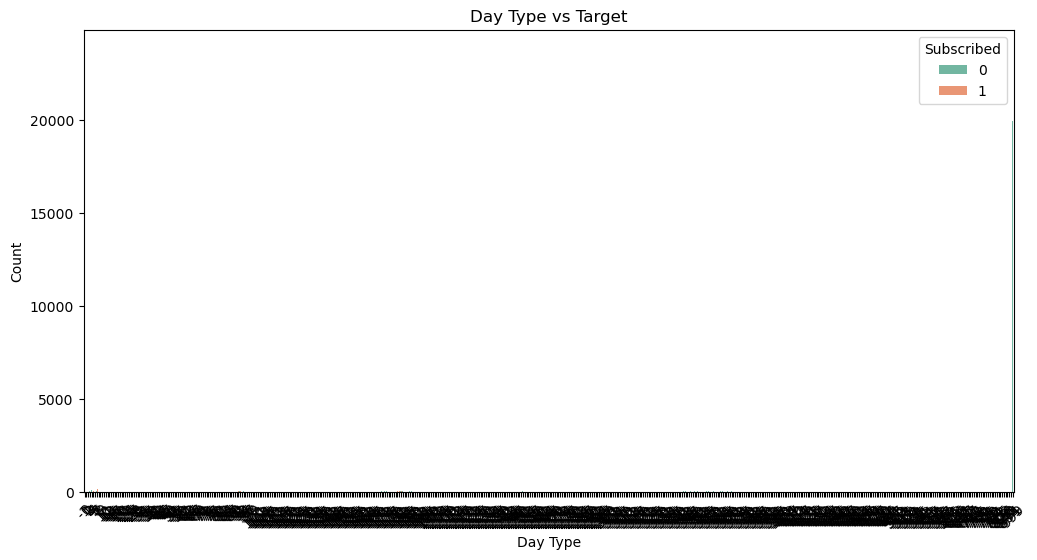

In [40]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='pdays', hue='Target', palette='Set2') 
plt.title('Day Type vs Target') 
plt.xlabel('Day Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Previous**


In [41]:
train['previous'].unique()

array([ 1,  0,  9,  7,  6,  4,  3,  2,  5,  8, 10, 14, 16, 27, 11, 23, 12,
       15, 17, 13, 24, 19, 30, 20, 21, 18, 29, 25, 40, 28, 22, 37, 38, 51,
       26, 35, 58, 41], dtype=int64)

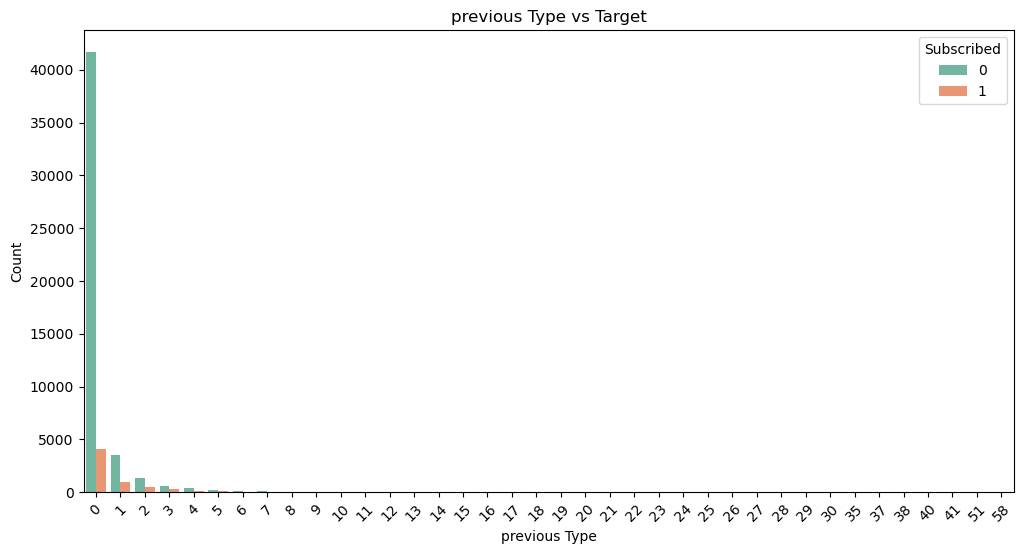

In [42]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=train, x='previous', hue='Target', palette='Set2') 
plt.title('previous Type vs Target') 
plt.xlabel('previous Type') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.legend(title='Subscribed') 
plt.show()

##### **Poutcome**


In [43]:
train['poutcome'].unique()

array(['failure', 'unknown', 'nonexistent', 'success', 'other'],
      dtype=object)

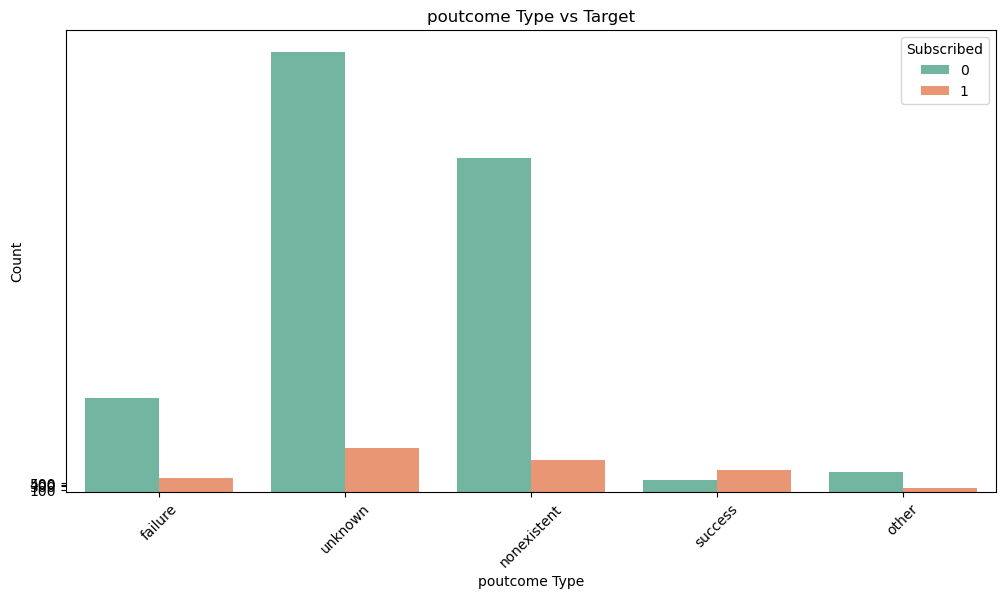

In [44]:

plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='poutcome', hue='Target', palette='Set2')
plt.title('poutcome Type vs Target')
plt.xlabel('poutcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks([100, 300, 400, 500])
plt.legend(title='Subscribed')
plt.show()

In [45]:
test['poutcome'].unique()

array(['nonexistent', 'unknown', 'failure', 'success', 'other'],
      dtype=object)

##### **Target**


In [46]:
train['Target'].unique()

array([0, 1], dtype=int64)

### Data Cleaning:


---



##### Filling NaN(unknown) Values:

In [47]:
#
#---------------------

#Train
eduRatios = []  # List to store individual DataFrames
for job in train["job"].unique():
    most_common_education = train[train["job"] == job]["education"].value_counts().to_frame().iloc[0]
    total_education_count = train[train["job"] == job]["education"].value_counts().sum()
    ratio_df = most_common_education * 100 / total_education_count
    ratio_df["Job"] = job
    eduRatios.append(ratio_df)

# Concatenate all the individual DataFrames into one
eduRatio = pd.concat(eduRatios, ignore_index=True)

# Reset index if necessary
eduRatio.reset_index(drop=True, inplace=True)

#-----------------------

#Test
eduRatios = []  # List to store individual DataFrames
for job in test["job"].unique():
    most_common_education = test[test["job"] == job]["education"].value_counts().to_frame().iloc[0]
    total_education_count = test[test["job"] == job]["education"].value_counts().sum()
    ratio_df = most_common_education * 100 / total_education_count
    ratio_df["Job"] = job
    eduRatios.append(ratio_df)

# Concatenate all the individual DataFrames into one
eduRatio = pd.concat(eduRatios, ignore_index=True)

# Reset index if necessary
eduRatio.reset_index(drop=True, inplace=True)



In [48]:
#JOB
#-----------------------------------------

#Train
train.loc[(train.job == "unknown") & (train.education == "secondary"),"job"] = "services"
train.loc[(train.job == "unknown") & (train.education == "primary"),"job"] = "housemaid"
train.loc[(train.job == "unknown") & (train.education == "tertiary"),"job"] = "management"
train.loc[(train.job == "unknown"),"job"] = "blue-collar"


#Test
test.loc[(test.job == "unknown") & (test.education == "secondary"),"job"] = "services"
test.loc[(test.job == "unknown") & (test.education == "primary"),"job"] = "housemaid"
test.loc[(test.job == "unknown") & (test.education == "tertiary"),"job"] = "management"
test.loc[(test.job == "unknown"),"job"] = "blue-collar"


In [49]:
#Education
#-----------------------------------------

#Train
train.loc[(train.education == "unknown") & (train.job == "admin."),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "management"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "services"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "technician."),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "retired"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "blue-collar"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "housemaid."),"education"] = "primary"
train.loc[(train.education == "unknown") & (train.job == "self-employed"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "student"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "entrepreneur"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "unemployed"),"education"] = "secondary"
#REST CAN BE SECONDARY
train.loc[(train.education == "unknown"),"education"] = "secondary"


#Test
test.loc[(test.education == "unknown") & (test.job == "admin."),"education"] = "secondary"
test.loc[(test.education == "unknown") & (test.job == "management"),"education"] = "secondary"
test.loc[(test.education == "unknown") & (test.job == "services"),"education"] = "tertiary"
test.loc[(test.education == "unknown") & (test.job == "technician."),"education"] = "secondary"
test.loc[(test.education == "unknown") & (test.job == "retired"),"education"] = "secondary"
test.loc[(test.education == "unknown") & (test.job == "blue-collar"),"education"] = "secondary"
test.loc[(test.education == "unknown") & (test.job == "housemaid."),"education"] = "primary"
test.loc[(test.education == "unknown") & (test.job == "self-employed"),"education"] = "tertiary"
test.loc[(test.education == "unknown") & (test.job == "student"),"education"] = "secondary"
test.loc[(test.education == "unknown") & (test.job == "entrepreneur"),"education"] = "tertiary"
test.loc[(test.education == "unknown") & (test.job == "unemployed"),"education"] = "secondary"
#REST CAN BE SECONDARY
test.loc[(test.education == "unknown"),"education"] = "secondary"


In [50]:
#Contact
#-----------------------------------------
#Train
train["contact"].replace(["unknown"],train["contact"].mode(),inplace = True)

#Test
test["contact"].replace(["unknown"],test["contact"].mode(),inplace = True)

C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\2028626128.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["contact"].replace(["unknown"],train["contact"].mode(),inplace = True)
C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\2028626128.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

##### solve null value in balance by Modeling:

In [51]:
# Split the data into two parts: rows with missing values and rows without missing values
df_missing = train[train['balance'].isnull()]  
df_not_missing = train[train['balance'].notnull()]  

# Split the non-missing data into features (X) and target (y)
X = df_not_missing.drop(columns=['balance'])  
y = df_not_missing['balance']  

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)


In [52]:
#Balance
#----------------------------
#Train
missing_col='balance'
# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Prepare the data with missing values
X_missing = df_missing.drop(columns=['balance'])

# Predict missing values
predicted_values = model.predict(X_missing)

# Fill in the missing values
train.loc[train['balance'].isnull(), missing_col] = predicted_values


In [53]:

#Balance
#----------------------------
#Test
# Define the column with missing values
missing_col = 'balance'

# Sample DataFrame (assuming test is your main DataFrame)
# test = pd.DataFrame({...}) # Define test DataFrame as required

# Identify numeric and categorical columns
numeric_cols = test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = test.select_dtypes(include=['object']).columns.tolist()

# Remove the target column 'balance' from the lists
numeric_cols.remove(missing_col) if missing_col in numeric_cols else None
categorical_cols.remove(missing_col) if missing_col in categorical_cols else None

# Define preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Split the data into training and testing sets
X = test.drop(columns=[missing_col])
y = test[missing_col].dropna()
X = X.loc[y.index]  # Ensure X and y have matching indices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Prepare the data with missing values
df_missing = test[test[missing_col].isnull()]
X_missing = df_missing.drop(columns=[missing_col])

# Check if X_missing is empty
if X_missing.shape[0] == 0:
    raise ValueError("No rows with missing 'balance' found in df_missing.")

# Predict missing values
predicted_values = model.predict(X_missing)

# Fill in the missing values in the test DataFrame
test.loc[test['balance'].isnull(), missing_col] = predicted_values

# Check if the missing values were filled
if test[missing_col].isnull().sum() > 0:
    raise ValueError("Some missing values in 'balance' were not filled.")
else:
    print("Missing values filled successfully.")

Missing values filled successfully.


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54712 entries, 0 to 54711
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54712 non-null  int64  
 1   id          54712 non-null  int64  
 2   age         54712 non-null  int64  
 3   job         54712 non-null  object 
 4   marital     54712 non-null  object 
 5   education   54712 non-null  object 
 6   default     54712 non-null  object 
 7   balance     54712 non-null  float64
 8   housing     54712 non-null  object 
 9   loan        54712 non-null  object 
 10  contact     54712 non-null  object 
 11  day         54712 non-null  object 
 12  month       54712 non-null  object 
 13  duration    54712 non-null  int64  
 14  campaign    54712 non-null  int64  
 15  pdays       54712 non-null  int64  
 16  previous    54712 non-null  int64  
 17  poutcome    54712 non-null  object 
 18  Target      54712 non-null  int64  
dtypes: float64(1), int64(8), 

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23449 entries, 0 to 23448
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23449 non-null  int64  
 1   id          23449 non-null  int64  
 2   age         23449 non-null  int64  
 3   job         23449 non-null  object 
 4   marital     23449 non-null  object 
 5   education   23449 non-null  object 
 6   default     23449 non-null  object 
 7   balance     23449 non-null  float64
 8   housing     23449 non-null  object 
 9   loan        23449 non-null  object 
 10  contact     23449 non-null  object 
 11  day         23449 non-null  object 
 12  month       23449 non-null  object 
 13  duration    23449 non-null  int64  
 14  campaign    23449 non-null  int64  
 15  pdays       23449 non-null  int64  
 16  previous    23449 non-null  int64  
 17  poutcome    23449 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 3.2+ MB


##### Handling:

In [56]:

month_names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Iterate through 'day' column and swap values if a month name is found
for i in range(len(test)):
    if test.at[i, 'day'] in month_names:
        # Swap values between 'day' and 'month'
        test.at[i, 'day'], test.at[i, 'month'] = test.at[i, 'month'], test.at[i, 'day']

for i in range(len(train)):
    if train.at[i, 'day'] in month_names:
        # Swap values between 'day' and 'month'
        train.at[i, 'day'], train.at[i, 'month'] = train.at[i, 'month'], train.at[i, 'day']


In [57]:
"""
train['age_bin'] = pd.cut(train['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])

test['age_bin'] = pd.cut(test['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])

"""

"\ntrain['age_bin'] = pd.cut(train['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])\n\ntest['age_bin'] = pd.cut(test['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])\n\n"

##### Drop:

In [58]:
train.drop(['day'], axis=1,inplace=True)
test.drop(['day'], axis=1,inplace=True)

train.drop(['Unnamed: 0'], axis=1,inplace=True)
test.drop(['Unnamed: 0'], axis=1,inplace=True)

print()


C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\744106653.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='Target', data=train,  ax=ax, palette='icefire')
C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\744106653.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='Target', data=train,  ax=ax, palette='icefire')
C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\744106653.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=col, y='Target', data=train,  ax=ax, palette='icefire')
C:\Users\Aya\AppData\Local\Temp\ip

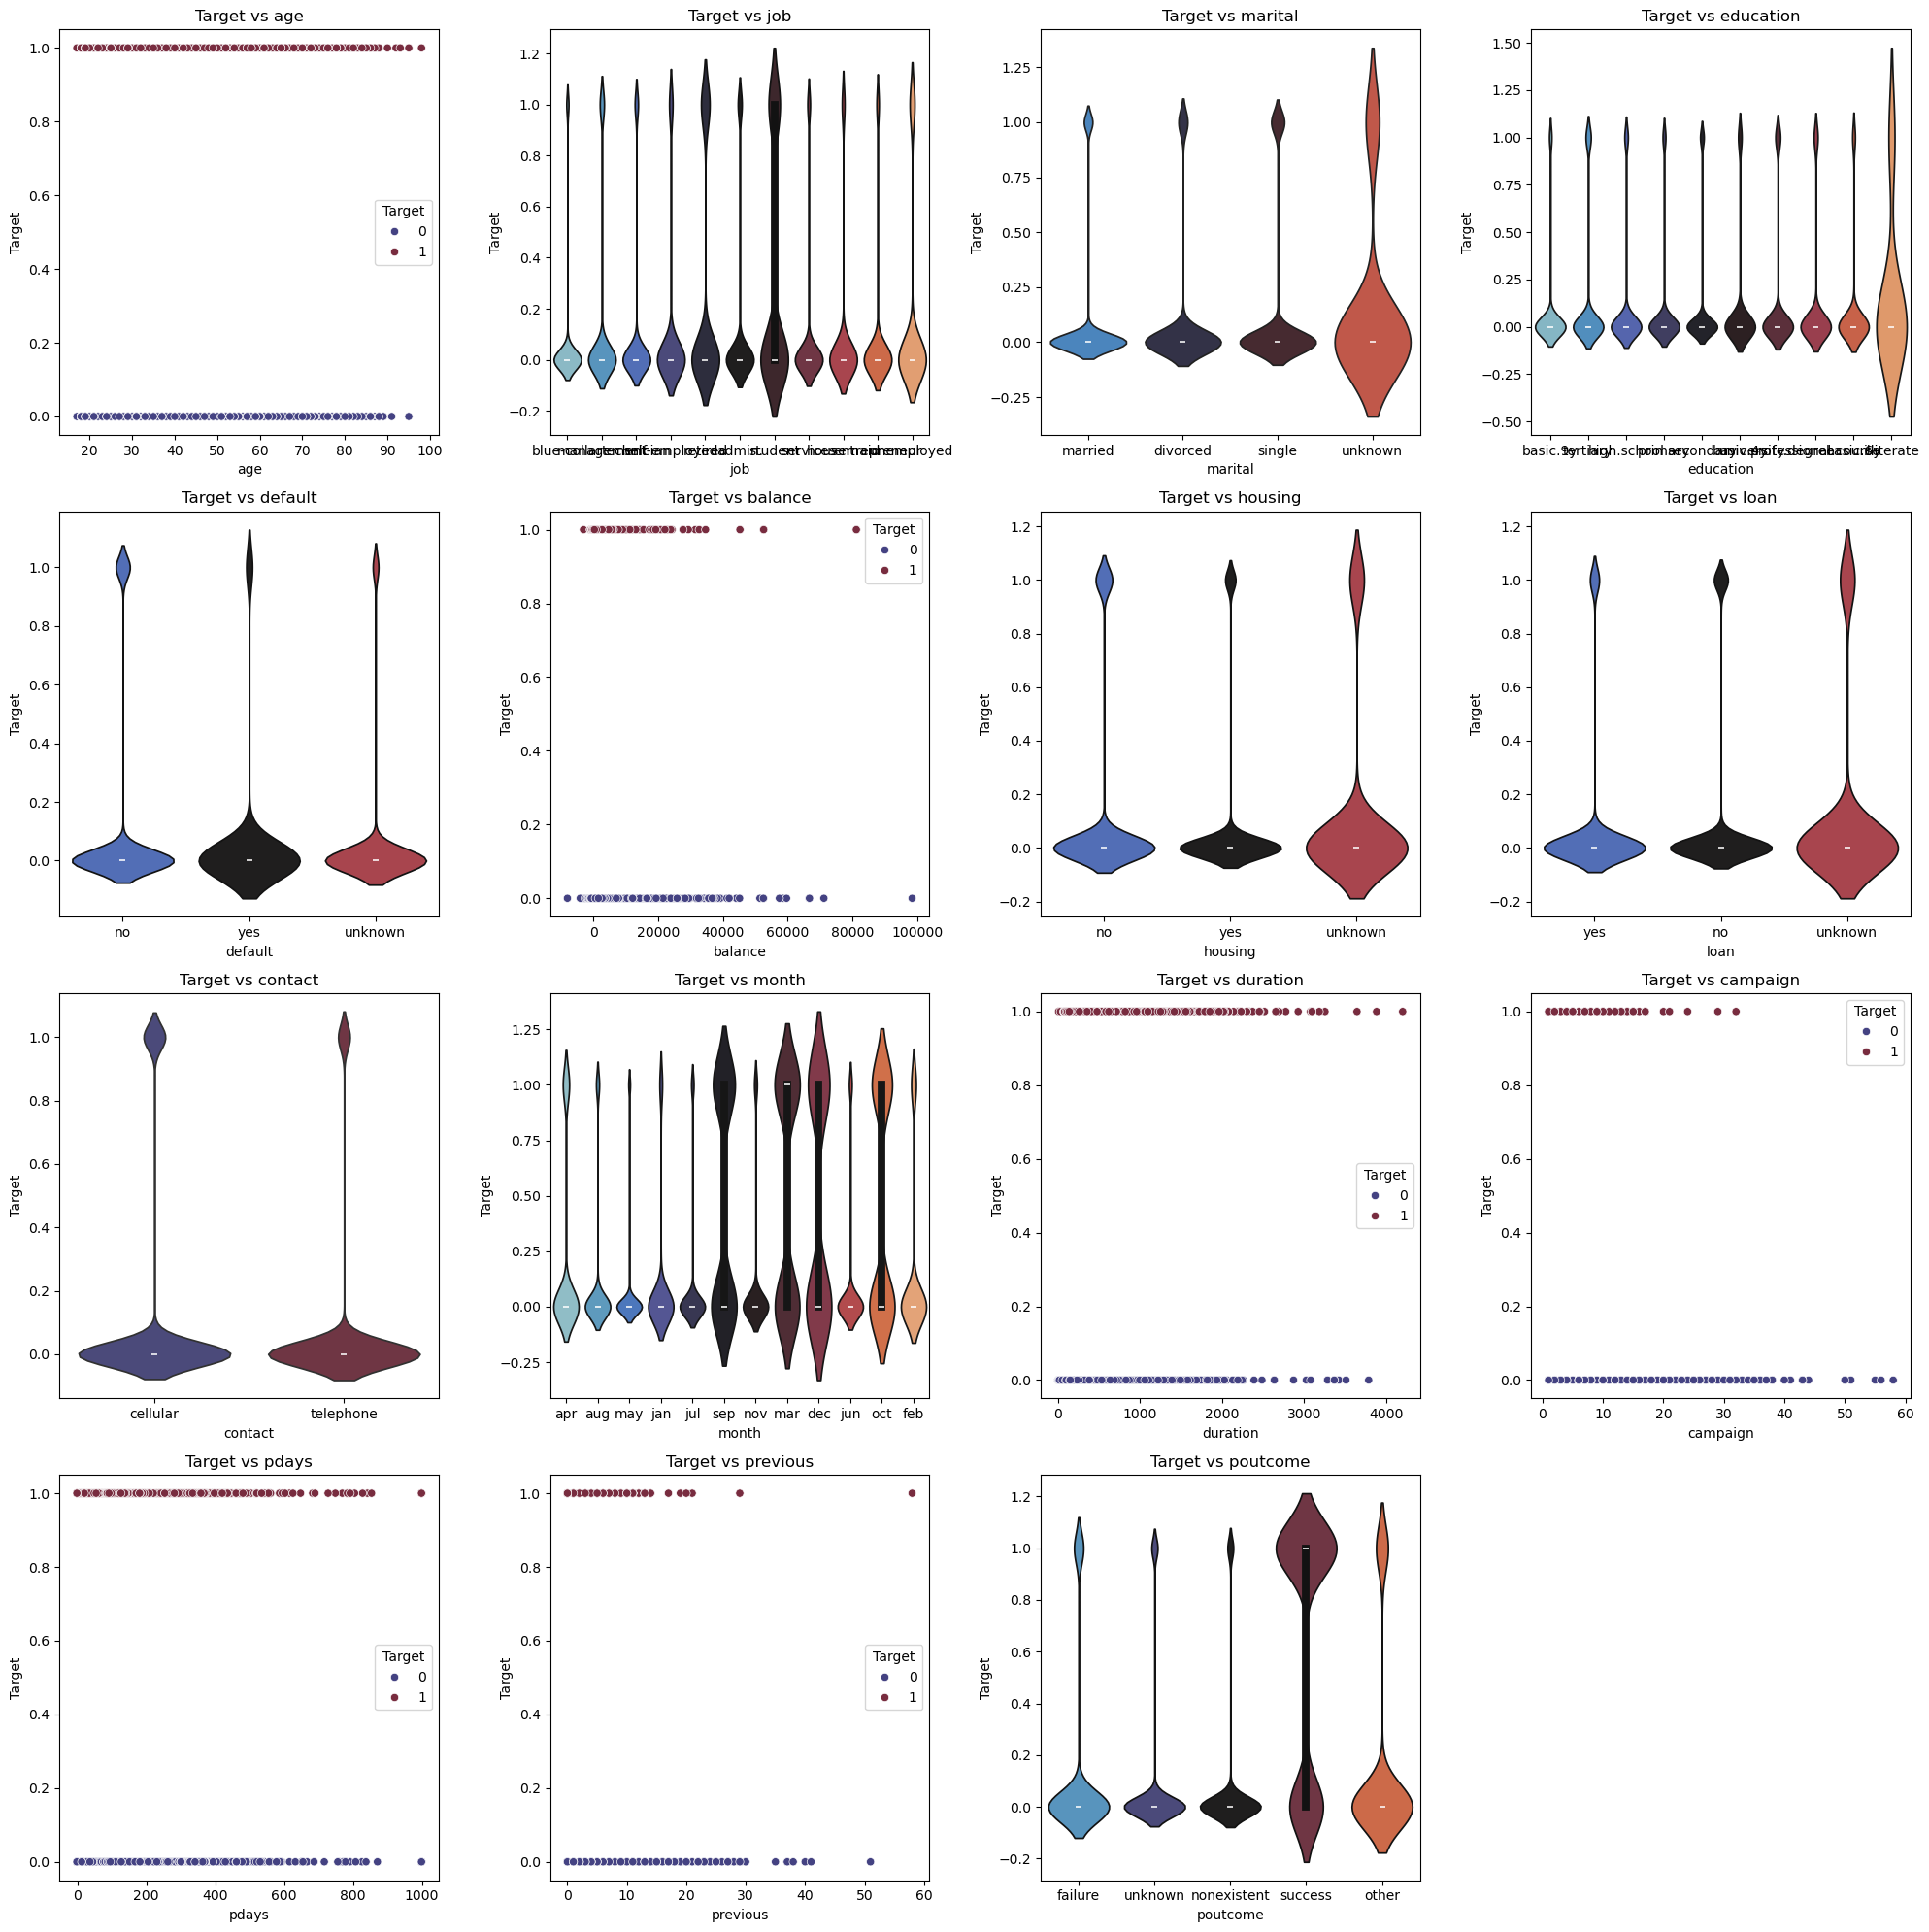

In [59]:

columns = ['age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact',  'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome']

# Create subplots
n_cols = 4
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for col, ax in zip(columns, axs):
    if train[col].dtype == 'object':  # Categorical columns
        sns.violinplot(x=col, y='Target', data=train,  ax=ax, palette='icefire')
    else:  # Numerical columns
        sns.scatterplot(x=col, y='Target', hue='Target', data=train, ax=ax, palette='icefire')

    ax.set_title(f'Target vs {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Target')

# Remove empty subplots
for ax in axs[len(columns):]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# herrrrrrrrrrrrrrrrrrrrrrrrrrrrrre

In [60]:
train[(train['loan']=='unknown') & (train['housing']=='unknown') & (train['default']=='no')]

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,Target
101,77073,50,admin.,married,university.degree,no,1756.19,unknown,unknown,cellular,apr,101,2,999,0,nonexistent,0
163,19482,55,services,single,basic.9y,no,6931.94,unknown,unknown,cellular,may,717,1,999,0,nonexistent,1
170,37630,48,management,married,basic.9y,no,2165.96,unknown,unknown,cellular,nov,373,1,999,0,nonexistent,0
343,81401,51,unemployed,married,high.school,no,2466.43,unknown,unknown,telephone,sep,228,1,999,2,failure,0
348,43460,32,admin.,married,university.degree,no,1700.92,unknown,unknown,cellular,aug,347,2,999,0,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53840,20616,39,entrepreneur,married,high.school,no,2622.18,unknown,unknown,telephone,jun,440,3,999,0,nonexistent,0
53924,52837,38,services,married,basic.9y,no,2800.35,unknown,unknown,telephone,may,114,1,999,0,nonexistent,0
54095,68995,36,admin.,married,university.degree,no,2915.11,unknown,unknown,telephone,jun,375,2,999,0,nonexistent,0
54120,42136,47,blue-collar,married,basic.9y,no,2205.26,unknown,unknown,cellular,jun,380,1,999,0,nonexistent,1


### Data preprocessing :


---



##### **Encoding**


In [61]:
categorical_cols = [col for col in train.columns if train.dtypes[col] == 'object']


#One hot encoding
#----------------------
#Train
train_dummy= pd.get_dummies(train[categorical_cols ])
train=pd.concat([train,train_dummy],axis=1)
train= train.drop(categorical_cols ,axis=1)

#Test
test_dummy= pd.get_dummies(test[categorical_cols ])
test=pd.concat([test,test_dummy],axis=1)
test= test.drop(categorical_cols ,axis=1)

##### **Resampling**


In [62]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN

### Machine Learning (ML):


---



In [63]:
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor 
from sklearn.linear_model import LogisticRegression , Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV , KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor, VotingRegressor , StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel



##### **Modelling**


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [65]:
submission_df = pd.read_csv('Sample_Submition.csv')

In [73]:
from xgboost import XGBClassifier


##### **EX1**


In [74]:
# Necessary imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from imblearn.over_sampling import RandomOverSampler

# Function to evaluate model performance using cross-validation
def evaluation(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    mae = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error').mean()
    mse = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()
    
    return mae, mse, rmse, f1

# Separate features and target from the training data
X_train = train.drop(['id', 'Target'], axis=1)
y_train = train['Target']
X_test = test.drop(['id'], axis=1)

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')

# Perform the grid search
grid_search.fit(X_resampled, y_resampled)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model
mae, mse, rmse, f1 = evaluation(best_rf, X_resampled, y_resampled)

# Print the evaluation results
print("RandomForestClassifier with RandomOverSampler and GridSearchCV")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"F1: {f1}")
print("-" * 30)

# Train the best model on the entire resampled training set
best_rf.fit(X_resampled, y_resampled)
best_predictions = best_rf.predict(X_test)

# Fill the Target column in the sample submission file with these predictions
submission_df['Target'] = best_predictions

# Save the updated sample submission file
submission_df.to_csv('EX2-RandomForest_RandomOverSampler_GridSearchCV.csv', index=False)

print("Submission file created successfully.")

c:\Users\Aya\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Aya\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Aya\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } 

RandomForestClassifier with RandomOverSampler and GridSearchCV
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 0.05076084884330108
MSE: 0.05076084884330108
RMSE: 0.22530168406672216
F1: 0.9492367643257899
------------------------------


c:\Users\Aya\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:59:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Submission file created successfully.


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN

## EX-Under

In [78]:

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss, TomekLinks, EditedNearestNeighbours
from xgboost import XGBClassifier

# Function to evaluate model performance using cross-validation
def evaluation(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    mae = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error').mean()
    mse = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()
    
    return mae, mse, rmse, f1

# Separate features and target from the training data
X_train = train.drop(['id', 'Target'], axis=1)
y_train = train['Target']
X_test = test.drop(['id'], axis=1)

# Initialize models DataFrame
models = pd.DataFrame(columns=["Model", "Resampling", "MAE", "MSE", "RMSE", "F1"])

# Define the parameter grid for XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# List of resampling techniques
resampling_list = [
    ("NearMiss", NearMiss()),
    ("TomekLinks", TomekLinks()),
    ("EditedNearestNeighbours", EditedNearestNeighbours()),
    ("RandomOverSampler", RandomOverSampler(random_state=42))
]

# Evaluate the model with each resampling technique
for resampling_name, resampler in resampling_list:
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
    
    # Perform the grid search
    grid_search.fit(X_resampled, y_resampled)
    
    # Get the best model
    best_xgb_model = grid_search.best_estimator_
    
    # Evaluate the best model
    mae, mse, rmse, f1 = evaluation(best_xgb_model, X_resampled, y_resampled)
    
    print(f"XGBClassifier with {resampling_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"F1: {f1}")
    print(classification_report(y_resampled, best_xgb_model.predict(X_resampled)))
    print("-" * 30)
    
    new_row = {"Model": "XGBClassifier", "Resampling": resampling_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "F1": f1}
    models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

print(models)

# Sort models by F1 score
models.sort_values(by="F1", ascending=False, inplace=True)

# Use the best model with the best resampling technique to make predictions for submission
best_resampling_name = models.iloc[0]['Resampling']
best_resampler = resampling_list[[name for name, _ in resampling_list].index(best_resampling_name)][1]

# Resample the entire training set
X_resampled, y_resampled = best_resampler.fit_resample(X_train, y_train)

# Train the best model on the resampled training set
best_xgb_model.fit(X_resampled, y_resampled)
best_predictions = best_xgb_model.predict(X_test)

# Fill the Target column in the sample submission file with these predictions
submission_df['Target'] = best_predictions

# Save the updated sample submission file
submission_df.to_csv('EX2-XG_UNDER_hyperpa', index=False)

print("Submission file created successfully.")


XGBClassifier with NearMiss
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.8}
MAE: 0.09945894116841311
MSE: 0.09945894116841311
RMSE: 0.31537111657286104
F1: 0.9005146448634316
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6279
           1       0.93      0.90      0.92      6279

    accuracy                           0.92     12558
   macro avg       0.92      0.92      0.92     12558
weighted avg       0.92      0.92      0.92     12558

------------------------------


C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\2802247265.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)


XGBClassifier with TomekLinks
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
MAE: 0.08500933017307319
MSE: 0.08500933017307319
RMSE: 0.2915635954180034
F1: 0.9102396749101336
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     46127
           1       0.79      0.63      0.70      6279

    accuracy                           0.94     52406
   macro avg       0.87      0.80      0.83     52406
weighted avg       0.93      0.94      0.93     52406

------------------------------
XGBClassifier with EditedNearestNeighbours
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.6}
MAE: 0.06697859574250421
MSE: 0.06697859574250421
RMSE: 0.25880223287774046
F1: 0.9308392343735956
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39243
           1       0.91

In [79]:
# Generate the classification report
print("Classification Report for the best model:")
y_pred = best_xgb_model.predict(X_resampled)
print(classification_report(y_resampled, y_pred))

Classification Report for the best model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48433
           1       1.00      1.00      1.00     48433

    accuracy                           1.00     96866
   macro avg       1.00      1.00      1.00     96866
weighted avg       1.00      1.00      1.00     96866



## Ex-over

In [80]:

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss, TomekLinks, EditedNearestNeighbours
from xgboost import XGBClassifier

# Function to evaluate model performance using cross-validation
def evaluation(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    mae = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error').mean()
    mse = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()
    
    return mae, mse, rmse, f1

# Separate features and target from the training data
X_train = train.drop(['id', 'Target'], axis=1)
y_train = train['Target']
X_test = test.drop(['id'], axis=1)

# Initialize models DataFrame
models = pd.DataFrame(columns=["Model", "Resampling", "MAE", "MSE", "RMSE", "F1"])

# Define the parameter grid for XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# List of resampling techniques
resampling_list = [
    ("SMOTE", SMOTE(random_state=42)),
    ("SMOTENC", SMOTENC(random_state=42, categorical_features=[0])), # Adjust categorical features as necessary
]
# Evaluate the model with each resampling technique
for resampling_name, resampler in resampling_list:
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
    
    # Perform the grid search
    grid_search.fit(X_resampled, y_resampled)
    
    # Get the best model
    best_xgb_model = grid_search.best_estimator_
    
    # Evaluate the best model
    mae, mse, rmse, f1 = evaluation(best_xgb_model, X_resampled, y_resampled)
    
    print(f"XGBClassifier with {resampling_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"F1: {f1}")
    print(classification_report(y_resampled, best_xgb_model.predict(X_resampled)))
    print("-" * 30)
    
    new_row = {"Model": "XGBClassifier", "Resampling": resampling_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "F1": f1}
    models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

print(models)

# Sort models by F1 score
models.sort_values(by="F1", ascending=False, inplace=True)

# Use the best model with the best resampling technique to make predictions for submission
best_resampling_name = models.iloc[0]['Resampling']
best_resampler = resampling_list[[name for name, _ in resampling_list].index(best_resampling_name)][1]

# Resample the entire training set
X_resampled, y_resampled = best_resampler.fit_resample(X_train, y_train)

# Train the best model on the resampled training set
best_xgb_model.fit(X_resampled, y_resampled)
best_predictions = best_xgb_model.predict(X_test)

# Fill the Target column in the sample submission file with these predictions
submission_df['Target'] = best_predictions

# Save the updated sample submission file
submission_df.to_csv('EX2-XG_over_hyperpa.csv', index=False)

print("Submission file created successfully.")


XGBClassifier with SMOTE
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 100, 'subsample': 1.0}
MAE: 0.05627362322061839
MSE: 0.05627362322061839
RMSE: 0.23722062140677905
F1: 0.9437237541612278
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     48433
           1       0.96      0.95      0.95     48433

    accuracy                           0.95     96866
   macro avg       0.95      0.95      0.95     96866
weighted avg       0.95      0.95      0.95     96866

------------------------------


C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\1931465809.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)


XGBClassifier with SMOTENC
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 100, 'subsample': 0.8}
MAE: 0.05699627952817153
MSE: 0.05699627952817153
RMSE: 0.23873893592828868
F1: 0.9430007227667669
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     48433
           1       0.96      0.94      0.95     48433

    accuracy                           0.95     96866
   macro avg       0.95      0.95      0.95     96866
weighted avg       0.95      0.95      0.95     96866

------------------------------
           Model Resampling       MAE       MSE      RMSE        F1
0  XGBClassifier      SMOTE  0.056274  0.056274  0.237221  0.943724
1  XGBClassifier    SMOTENC  0.056996  0.056996  0.238739  0.943001
Submission file created successfully.


In [81]:
# Generate the classification report
print("Classification Report for the best model:")
y_pred = best_xgb_model.predict(X_resampled)
print(classification_report(y_resampled, y_pred))

Classification Report for the best model:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     48433
           1       0.96      0.94      0.95     48433

    accuracy                           0.95     96866
   macro avg       0.95      0.95      0.95     96866
weighted avg       0.95      0.95      0.95     96866



## EX-com

In [82]:

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss, TomekLinks, EditedNearestNeighbours
from xgboost import XGBClassifier

# Function to evaluate model performance using cross-validation
def evaluation(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    mae = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error').mean()
    mse = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()
    
    return mae, mse, rmse, f1

# Separate features and target from the training data
X_train = train.drop(['id', 'Target'], axis=1)
y_train = train['Target']
X_test = test.drop(['id'], axis=1)

# Initialize models DataFrame
models = pd.DataFrame(columns=["Model", "Resampling", "MAE", "MSE", "RMSE", "F1"])

# Define the parameter grid for XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# List of resampling techniques
resampling_list = [
    ("SMOTETomek", SMOTETomek()),
    ("SMOTEENN", SMOTEENN())
]

# Evaluate the model with each resampling technique
for resampling_name, resampler in resampling_list:
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
    
    # Perform the grid search
    grid_search.fit(X_resampled, y_resampled)
    
    # Get the best model
    best_xgb_model = grid_search.best_estimator_
    
    # Evaluate the best model
    mae, mse, rmse, f1 = evaluation(best_xgb_model, X_resampled, y_resampled)
    
    print(f"XGBClassifier with {resampling_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"F1: {f1}")
    print(classification_report(y_resampled, best_xgb_model.predict(X_resampled)))
    print("-" * 30)
    
    new_row = {"Model": "XGBClassifier", "Resampling": resampling_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "F1": f1}
    models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

print(models)

# Sort models by F1 score
models.sort_values(by="F1", ascending=False, inplace=True)

# Use the best model with the best resampling technique to make predictions for submission
best_resampling_name = models.iloc[0]['Resampling']
best_resampler = resampling_list[[name for name, _ in resampling_list].index(best_resampling_name)][1]

# Resample the entire training set
X_resampled, y_resampled = best_resampler.fit_resample(X_train, y_train)

# Train the best model on the resampled training set
best_xgb_model.fit(X_resampled, y_resampled)
best_predictions = best_xgb_model.predict(X_test)

# Fill the Target column in the sample submission file with these predictions
submission_df['Target'] = best_predictions

# Save the updated sample submission file
submission_df.to_csv('EX2-XGB_comb.csv', index=False)

print("Submission file created successfully.")


XGBClassifier with SMOTETomek
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 100, 'subsample': 1.0}
MAE: 0.05637842465753425
MSE: 0.05637842465753425
RMSE: 0.23744141310549483
F1: 0.9436194409362442
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     46720
           1       0.96      0.95      0.96     46720

    accuracy                           0.96     93440
   macro avg       0.96      0.96      0.96     93440
weighted avg       0.96      0.96      0.96     93440

------------------------------


C:\Users\Aya\AppData\Local\Temp\ipykernel_4376\566211346.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)


XGBClassifier with SMOTEENN
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 100, 'subsample': 1.0}
MAE: 0.034361307579206635
MSE: 0.034361307579206635
RMSE: 0.18536803278668798
F1: 0.9656255675159114
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     33005
           1       0.98      0.98      0.98     39693

    accuracy                           0.97     72698
   macro avg       0.97      0.97      0.97     72698
weighted avg       0.97      0.97      0.97     72698

------------------------------
           Model  Resampling       MAE       MSE      RMSE        F1
0  XGBClassifier  SMOTETomek  0.056378  0.056378  0.237441  0.943619
1  XGBClassifier    SMOTEENN  0.034361  0.034361  0.185368  0.965626
Submission file created successfully.


# HistGradientBoostingClassifier

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from imblearn.combine import SMOTETomek, SMOTEENN
import pandas as pd
import numpy as np

# Function to evaluate model performance using cross-validation
def evaluation(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    mae = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error').mean()
    mse = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    rmse = np.sqrt(mse)
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted').mean()
    
    return mae, mse, rmse, f1

# Separate features and target from the training data
X_train = train.drop(['id', 'Target'], axis=1)
y_train = train['Target']
X_test = test.drop(['id'], axis=1)

# Initialize models DataFrame
models = pd.DataFrame(columns=["Model", "Resampling", "MAE", "MSE", "RMSE", "F1"])

# Define the parameter grid for HistGradientBoostingClassifier
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'max_iter': [100, 200, 300],
    'min_samples_leaf': [1, 2, 4],
    'l2_regularization': [0.0, 0.1, 1.0]
}

# Define the HistGradientBoostingClassifier model
hgbc_model = HistGradientBoostingClassifier(random_state=42)

# List of resampling techniques
resampling_list = [
    ("SMOTETomek", SMOTETomek()),
    ("SMOTEENN", SMOTEENN())
]

# Evaluate the model with each resampling technique
for resampling_name, resampler in resampling_list:
    X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=hgbc_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')
    
    # Perform the grid search
    grid_search.fit(X_resampled, y_resampled)
    
    # Get the best model
    best_hgbc_model = grid_search.best_estimator_
    
    # Evaluate the best model
    mae, mse, rmse, f1 = evaluation(best_hgbc_model, X_resampled, y_resampled)
    
    print(f"HistGradientBoostingClassifier with {resampling_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"F1: {f1}")
    print(classification_report(y_resampled, best_hgbc_model.predict(X_resampled)))
    print("-" * 30)
    
    new_row = {"Model": "HistGradientBoostingClassifier", "Resampling": resampling_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "F1": f1}
    models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

print(models)

# Sort models by F1 score
models.sort_values(by="F1", ascending=False, inplace=True)

# Use the best model with the best resampling technique to make predictions for submission
best_resampling_name = models.iloc[0]['Resampling']
best_resampler = resampling_list[[name for name, _ in resampling_list].index(best_resampling_name)][1]

# Resample the entire training set
X_resampled, y_resampled = best_resampler.fit_resample(X_train, y_train)

# Train the best model on the resampled training set
best_hgbc_model.fit(X_resampled, y_resampled)
best_predictions = best_hgbc_model.predict(X_test)

# Fill the Target column in the sample submission file with these predictions
submission_df['Target'] = best_predictions

# Save the updated sample submission file
submission_df.to_csv("C:\\Users\\shath\\OneDrive\\Documents\\tahalf\\8.project\\2.banking\\الامل المقطوع.csv", index=False)

print("Submission file created successfully.")
